# Analisis Exploratorio Datos Properati

In [1]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (15, 5)

prop = pd.read_csv('datos.csv', low_memory=False)

#prop = pd.read_csv('Propiedades-0701.csv', low_memory=False)

In [2]:
#vemos la forma en que se muestran los datos
prop.tail()

,Unnamed: 0,created_on,description,expenses,extra,floor,geonames_id,id,lat-lon,place_name,place_with_parent_names,price_aprox_usd,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_total_in_m2,title
686479,1628935,2017-01-22,Corredor Responsable: Ariel Champanier - CUCIC...,NaN,NaN,NaN,3430570.0,4fe9193de1ae5a40e263c068456cb241929b7562,"-34.60952,-58.3805",Monserrat,|Argentina|Capital Federal|Monserrat|,0.0,NaN,http://www.properati.com.ar/1517b_venta_local_...,store,NaN,Capital Federal,NaN,NaN,LOCAL 242 MTS SOBRE AVDA 9 DE JULIO
686480,1628941,2017-01-22,Corredor Responsable: Martin Manias - CMCLZ 40...,NaN,NaN,NaN,3433762.0,aa95c18fd185533ed8013b62fe3079d811fcde14,"-34.889363,-58.381948",Glew,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,90000.0,71355.15,http://www.properati.com.ar/1517j_venta_local_...,store,NaN,Bs.As. G.B.A. Zona Sur,20.0,1.261296,LOCAL EN LA ZONA CENTRICA DE GLEW
686481,1629166,2017-01-14,"Venta - Local - Argentina, Buenos Aires, Pilar...",NaN,NaN,NaN,NaN,b02c9ec630618708cd5881c61c4d72a929e5b328,"-34.4112684,-58.8487325",Bermudas Country Club,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Berm...,250000.0,NaN,http://www.properati.com.ar/14vs6_venta_local_...,store,1.0,Bs.As. G.B.A. Zona Norte,NaN,NaN,Local en Venta ubicado en Pilar
686482,1629226,2017-01-04,"Edificado sobre un lote de 8 x 35,40 metros.Fr...",NaN,NaN,NaN,6693230.0,f192f4bc806b0bdad03f60c611ca54aad4595b51,"-34.6120493842,-58.4810373166",Villa Santa Rita,|Argentina|Capital Federal|Villa Santa Rita|,540000.0,NaN,http://www.properati.com.ar/14p8e_venta_local_...,store,NaN,Capital Federal,NaN,NaN,LOCAL EN VENTA
686483,1629627,2017-01-13,PH 4/5 Amb Sobre Av. Maip? Ideal Para Refaccio...,NaN,NaN,NaN,3427504.0,19347df2269c8bbdaecd8d26e122c3c716ec8e56,"-34.5316651,-58.4794541",Vicente López,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,0.0,0.00,http://www.properati.com.ar/14v2i_venta_local_...,store,NaN,Bs.As. G.B.A. Zona Norte,86.0,239.000000,PH 4/5 Amb Sobre Av. Maip? Ideal Para Refaccio...


In [3]:
#los tipos de datos de cada columna
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686484 entries, 0 to 686483
Data columns (total 20 columns):
Unnamed: 0                 686484 non-null int64
created_on                 686484 non-null object
description                390777 non-null object
expenses                   33438 non-null object
extra                      224871 non-null object
floor                      148419 non-null float64
geonames_id                559694 non-null float64
id                         165913 non-null object
lat-lon                    511707 non-null object
place_name                 686407 non-null object
place_with_parent_names    686484 non-null object
price_aprox_usd            686484 non-null float64
price_usd_per_m2           535723 non-null float64
properati_url              686484 non-null object
property_type              686484 non-null object
rooms                      404253 non-null float64
state_name                 165913 non-null object
surface_covered_in_m2      147193 no

# ¿cuales son los barrios mas costosos de cada zona?

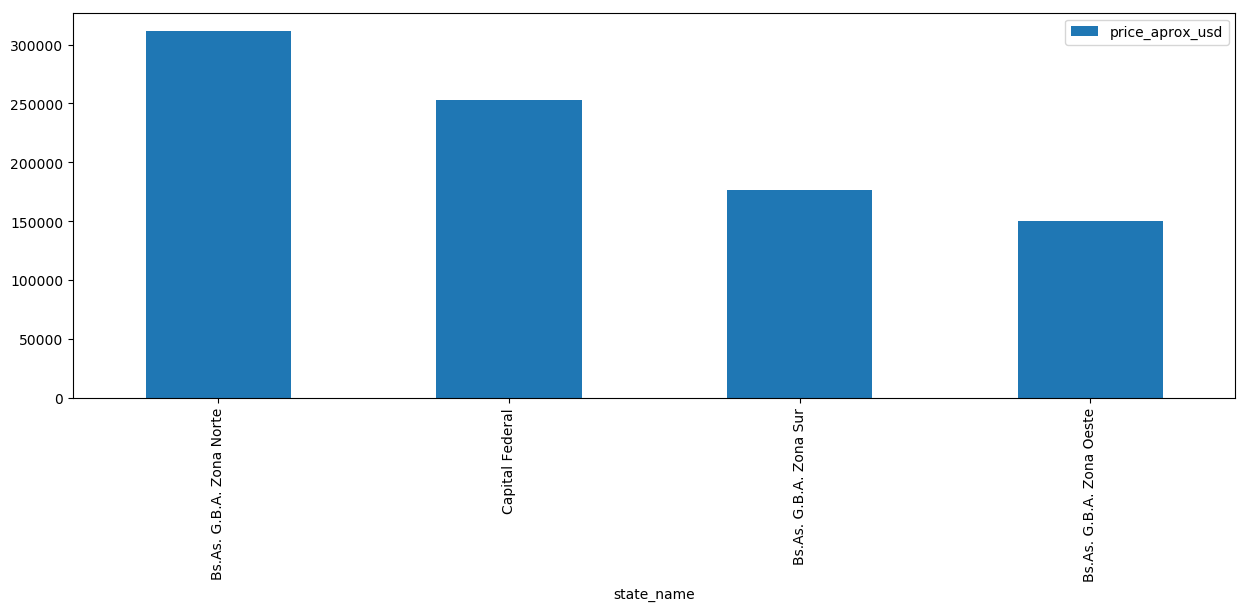

In [4]:
#¿cual es la zona mas costosa en promedio?
zonas = prop[['state_name','price_aprox_usd']].groupby('state_name').agg({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending=False).plot(kind='bar')
zonas

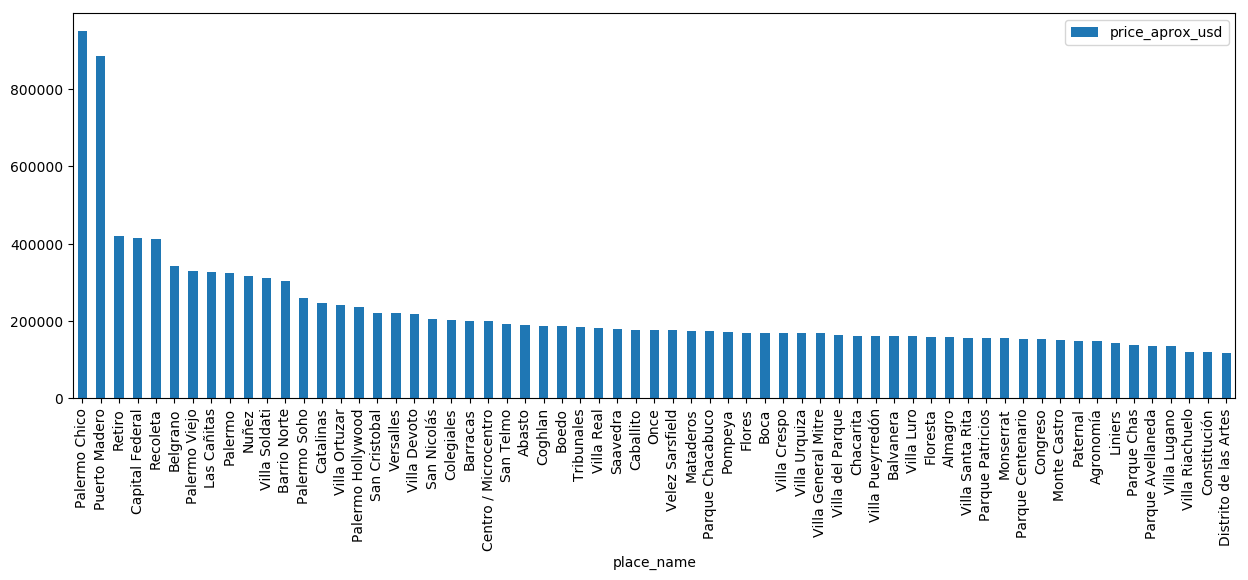

In [5]:
#¿barrios mas costosos Capital Federal?
capital = prop.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_cap = capital[['state_name','place_name','price_aprox_usd']][capital['state_name']=="Capital Federal"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False).plot(kind='bar')
top_mayor_prom_pre_cap

In [6]:
#lo que es observa es que desde la zona de retiro hacia el noreste los barios mas cercanos al rio tienden a estar entre
#los mas costosos de Capital Federal

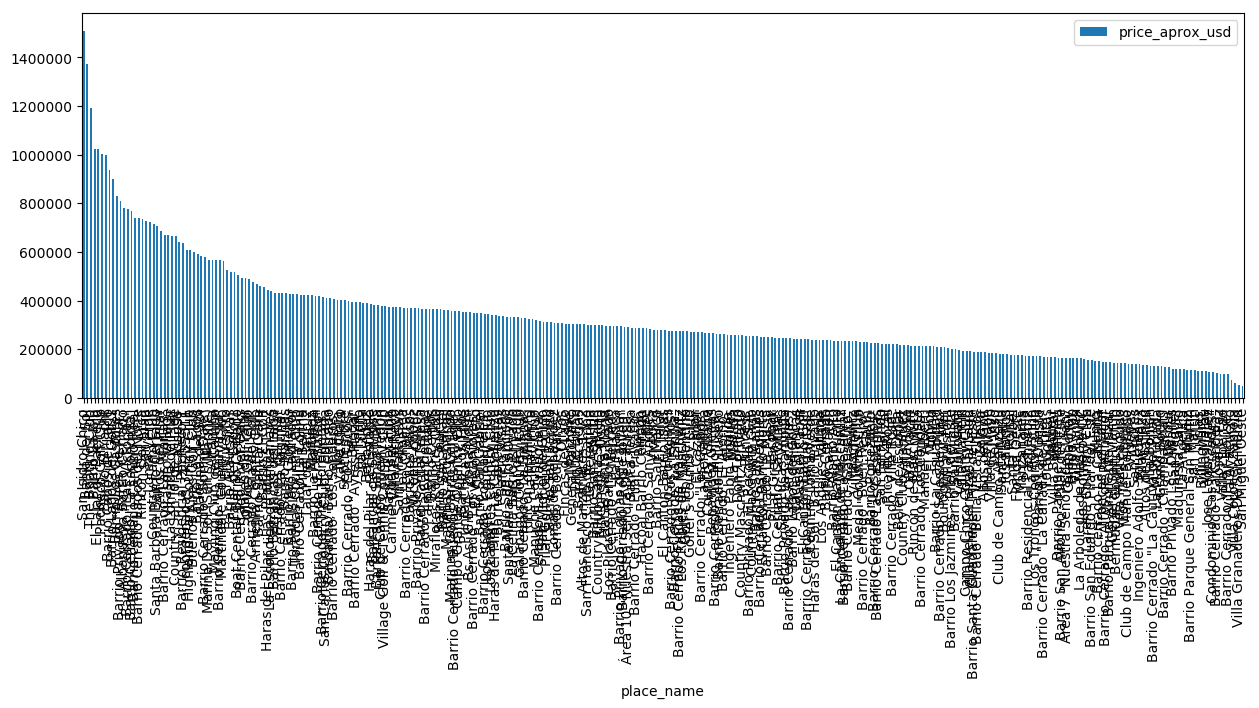

In [7]:
#¿barrios mas costosos zona norte?
zonanorte = prop.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_nor = zonanorte[['state_name','place_name','price_aprox_usd']][zonanorte['state_name']=="Bs.As. G.B.A. Zona Norte"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False).plot(kind='bar')
top_mayor_prom_pre_nor

In [8]:
#¿barrios mas costosos zona sur?
zonasur = prop.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_sur = zonasur[['state_name','place_name','price_aprox_usd']][zonasur['state_name']=="Bs.As. G.B.A. Zona Sur"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False)
top_mayor_prom_pre_sur

,price_aprox_usd
place_name,
Grand Bell,880000.000000
Abril Club de Campo,686142.857143
Country Saint Thomas,505042.857143
Pereyra,499000.000000
Country Nuevo Quilmes,485367.647059
Las Golondrinas,481500.000000
Terralagos,450000.000000
Santa Juana,450000.000000
Malvinas Argentinas,440166.666667


In [9]:
#¿barrios mas costosos zona oeste?
zonaoeste = prop.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_oes = zonaoeste[['state_name','place_name','price_aprox_usd']][zonaoeste['state_name']=="Bs.As. G.B.A. Zona Oeste"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False)
top_mayor_prom_pre_oes

,price_aprox_usd
place_name,
Cruce Castelar,795000.000000
El Casco de Leloir,589285.714286
Terravista Barrio Privado,552333.333333
Campos de Álvarez,533780.487805
San Diego Country Club,463000.000000
Barrio Privado Altos del Sol,425730.769231
Barrio cerrado Santa Ana,424166.666667
"Barrio Cerrado ""El Casco de Moreno""",379000.000000
Los Pingüinos Country Club,375000.000000


In [10]:
#observamos que los barrios con mayor cercania al rio, o los barrios privados tiendenn a ser los mas costosos de cada 
#zona 

# analizando datos de departamentos

In [11]:
#hay alguna relacion entre el precio y la cantidad de departamentos por area cubierta en capital federal
x=prop['state_name']=="Capital Federal"
y=prop['property_type']=="apartment"
z=prop['surface_covered_in_m2']<80.000000
relacion_cantidad_departamentos_con_precio_zona_en_capital=top_con_mayor_promedio_precio_GB=\
prop[['state_name','place_name','price_aprox_usd','property_type']][ x& y&z].groupby('place_name').\
agg({'price_aprox_usd':'mean','property_type':'count'}).sort_values( by='price_aprox_usd' ,ascending=False)

relacion_cantidad_departamentos_con_precio_zona_en_capital.rename(columns={'property_type': 'Cantidad De Departamentos'}, inplace=True)

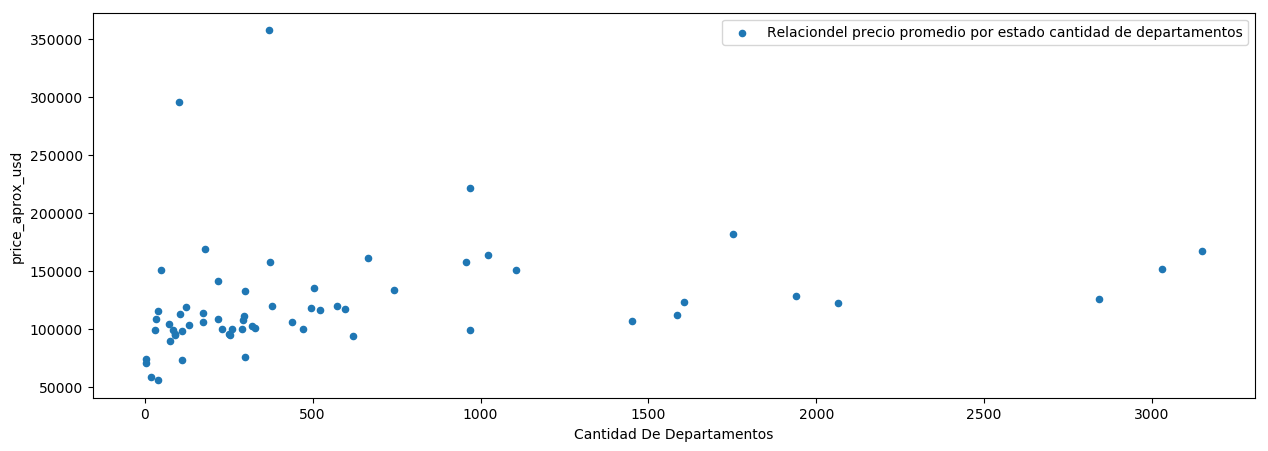

In [12]:
relacion_cantidad_departamentos_con_precio_zona_en_capital\
.plot.scatter(x='Cantidad De Departamentos',y='price_aprox_usd',label='Relaciondel precio promedio por estado cantidad de departamentos')



In [13]:
#de los departamentos de que se encuentran entre el piso 15 y 100 de su edificio
#de estos los barrios mas costosos de capital
edif = prop.dropna(subset=['floor'])
capital = edif['state_name']=="Capital Federal"
departamento = edif['property_type'] == "apartment"
menos100=edif['floor'] < 100
mas15=edif['floor'] > 0
res=edif[departamento&capital&menos100&mas15][['place_name','price_aprox_usd','floor','state_name']]
res=res.groupby('place_name').agg({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending = 0).head(10)
res


,price_aprox_usd
place_name,
Palermo Chico,648650.000000
Puerto Madero,555238.000000
Las Cañitas,314731.707317
Recoleta,300994.014128
Belgrano,254700.749103
Retiro,240307.865169
Palermo,229177.103542
Nuñez,224156.564667
Barrio Norte,219154.998591


In [14]:
#de los departamentos de que se encuentran entre el piso 15 y 100 de su edificio
#de estos los barrios mas costosos de zona norte
edif = prop.dropna(subset=['floor'])
capital = edif['state_name']=="Bs.As. G.B.A. Zona Norte"
departamento = edif['property_type'] == "apartment"
menos100=edif['floor'] < 100
mas15=edif['floor'] > 0
res=edif[departamento&capital&menos100&mas15][['place_name','price_aprox_usd','floor','state_name']]
res=res.groupby('place_name').agg({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending = 0).head(10)
res


,price_aprox_usd
place_name,
Barrio El Golf,365000.000000
La Lucila,336830.238095
Pilar Golf Country Club,320000.000000
Vicente López,300204.061151
Florida,296998.076923
Acassuso,292319.608828
Olivos,288239.165289
Martínez,253399.754762
Barrio Los Castores,249000.000000


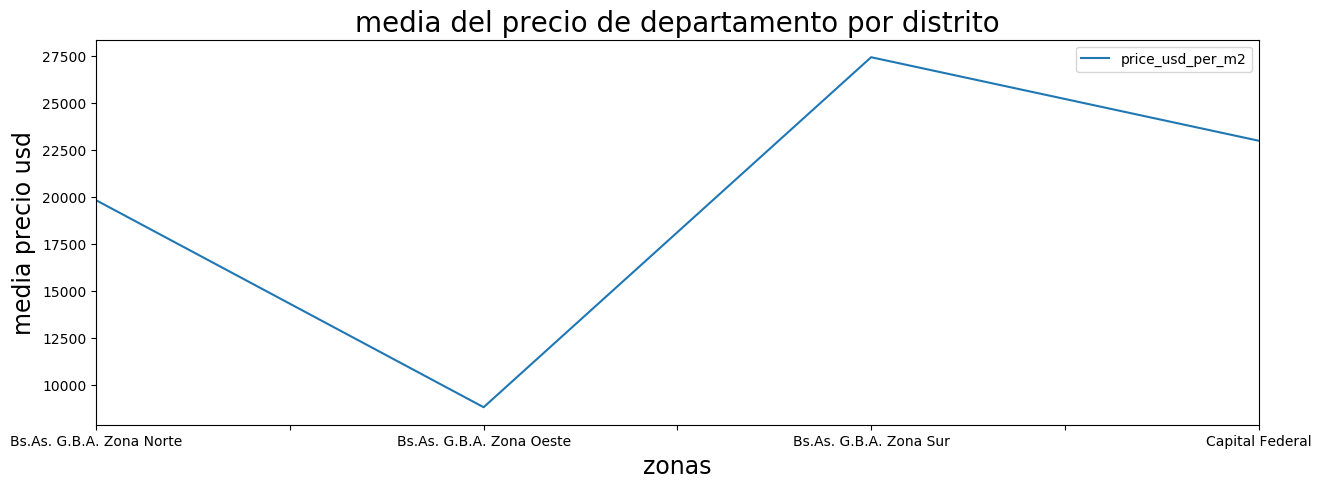

In [15]:
#comparacion de precios de departamentos por distrito
edif = prop.dropna(subset=['floor'])
departamento = edif['property_type'] == "apartment"
menos100=edif['floor'] < 100
mas15=edif['floor'] > 0
res=edif[departamento&menos100&mas15][['place_name','price_usd_per_m2','floor','state_name']]
res.groupby('state_name').agg({'price_usd_per_m2':'mean'}).plot()
plt.title('media del precio de departamento por distrito', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);


In [16]:
#en el grafico podemos observar que los distritos de capital y zona norte son los que poseen
#los departamentos mas costosos con medias de mas 2000usd/m2

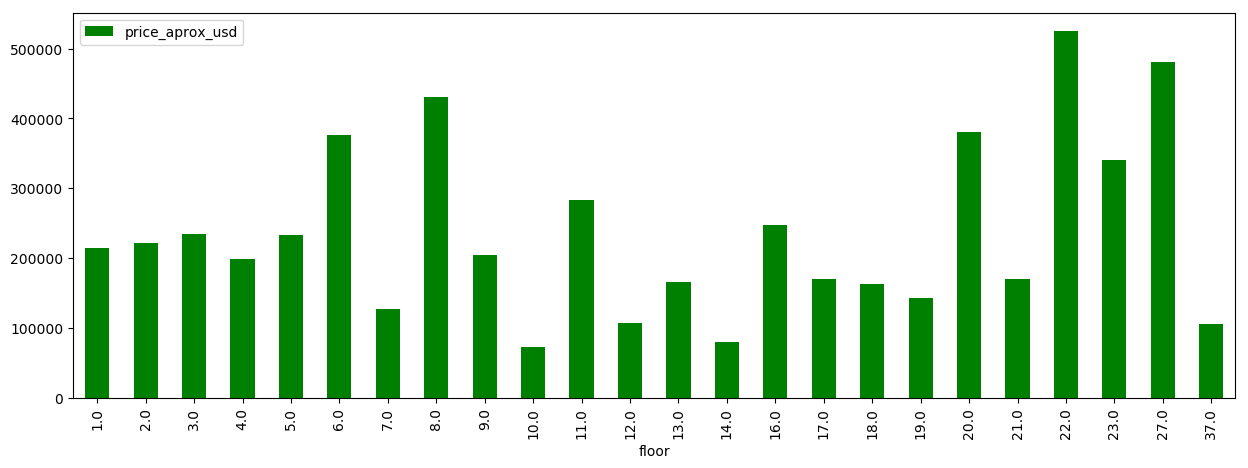

In [17]:
#comparacion de precios de departamentos por distrito
edif = prop.dropna(subset=['floor'])
edif = prop.dropna(subset=['price_usd_per_m2'])
departamento = edif['property_type'] == "apartment"
#capital = edif['state_name'] == "Capital Federal"
barrio = edif['place_name'] == 'Retiro'
menos100=edif['floor'] < 40
mas15=edif['floor'] > 0
res=edif[barrio&departamento&menos100&mas15][['place_name','price_aprox_usd','floor','state_name']]
res.groupby('floor').agg({'price_aprox_usd':'mean'}).plot(kind = 'bar',color='green' )#.sort_values(by='price_aprox_usd_per_m2',ascending = 0)


# comparacion de precios en las distintas zonas del conurbano y capital
# respecto de los diferentes tipos de propiedades


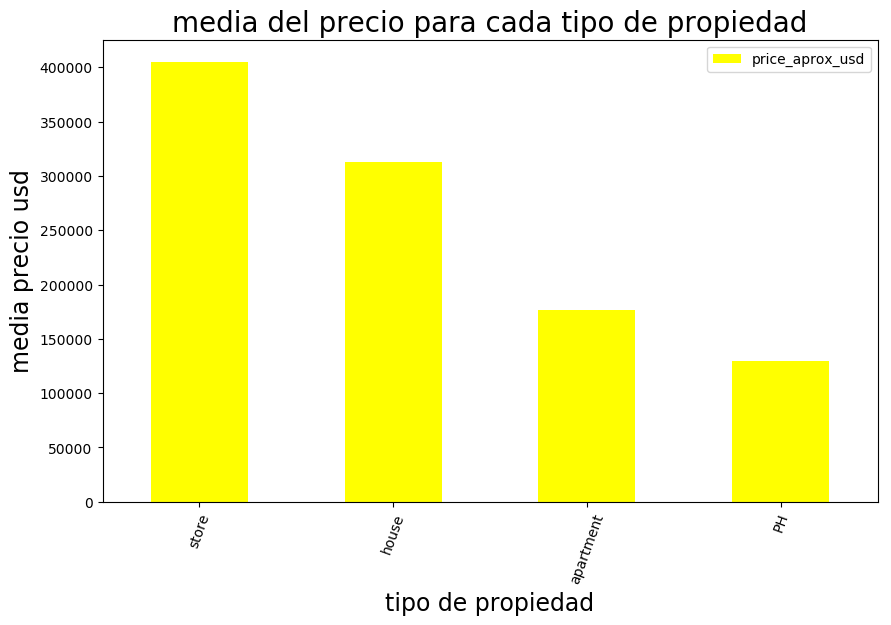

In [18]:
# para todos las zonas cuales propiedades son mas costosas de media
propiedades = prop[['state_name','place_name','price_aprox_usd','property_type']]\
.groupby('property_type').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False)
propiedades.plot(kind='bar', rot=70, figsize=(10,6), color='yellow', fontsize=10, grid=False);
plt.title('media del precio para cada tipo de propiedad', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('tipo de propiedad', fontsize=17);

In [19]:
#en este grafico podemos observar la cantidad de propiedades de cada tipo que nos cedio properati

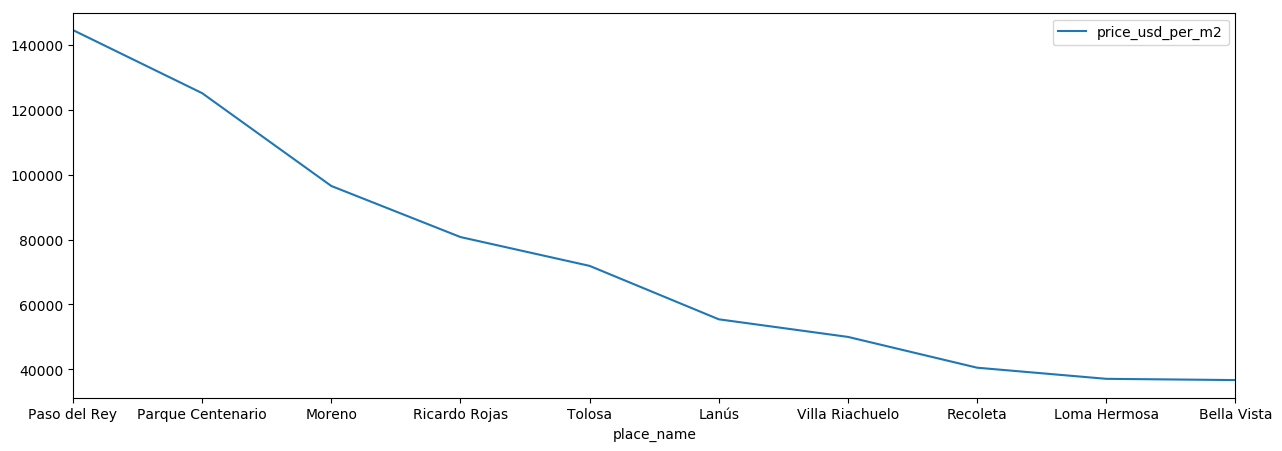

In [20]:
#los lugares con los ph mas costosos por m2
esPH=prop['property_type']=="PH"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('place_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).head(10).plot()

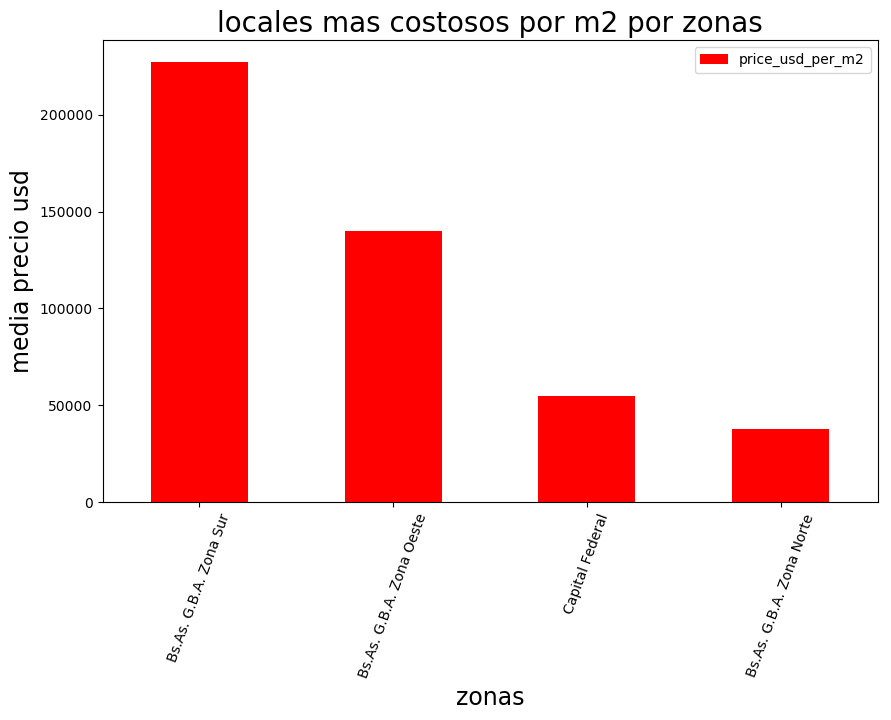

In [21]:
#los lugares con las casas mas costosas por m2
esPH=prop['property_type']=="store"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('state_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).plot(kind='bar', rot=70, figsize=(10,6), color='red', fontsize=10, grid=False);
plt.title('locales mas costosos por m2 por zonas', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [22]:
#podemos observar que los locales mas costosos se encuentran en capital federal y que en los otros
#tres distritos los precios son bastantes parecidos

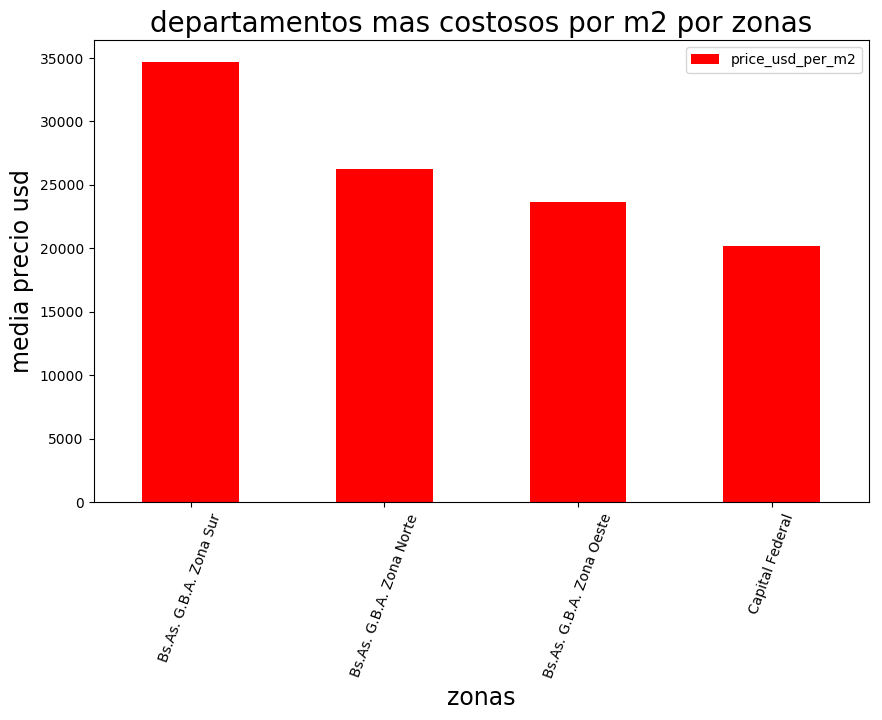

In [23]:
#los lugares con los departamentos mas costosas por m2
esPH=prop['property_type']=="apartment"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('state_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).plot(kind='bar', rot=70, figsize=(10,6), color='red', fontsize=10, grid=False);
plt.title('departamentos mas costosos por m2 por zonas', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [24]:
#nuevamente observamos que capital posee los departamentos mas costosos as como zona sur y oeste posee precios similares

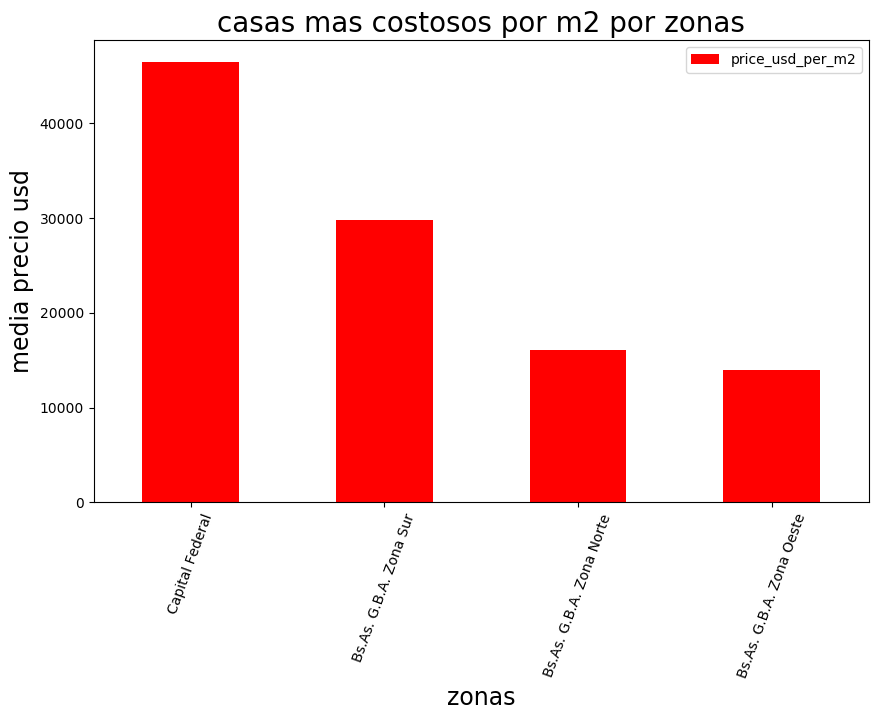

In [25]:
#los lugarares con las casas mas costosas por m2
esPH=prop['property_type']=="house"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('state_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).plot(kind='bar', rot=70, figsize=(10,6), color='red', fontsize=10, grid=False);
plt.title('casas mas costosos por m2 por zonas', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [26]:
#respecto al precio de las casas capital tambien lleva una ventaja apreciable respecto a los demas distritos

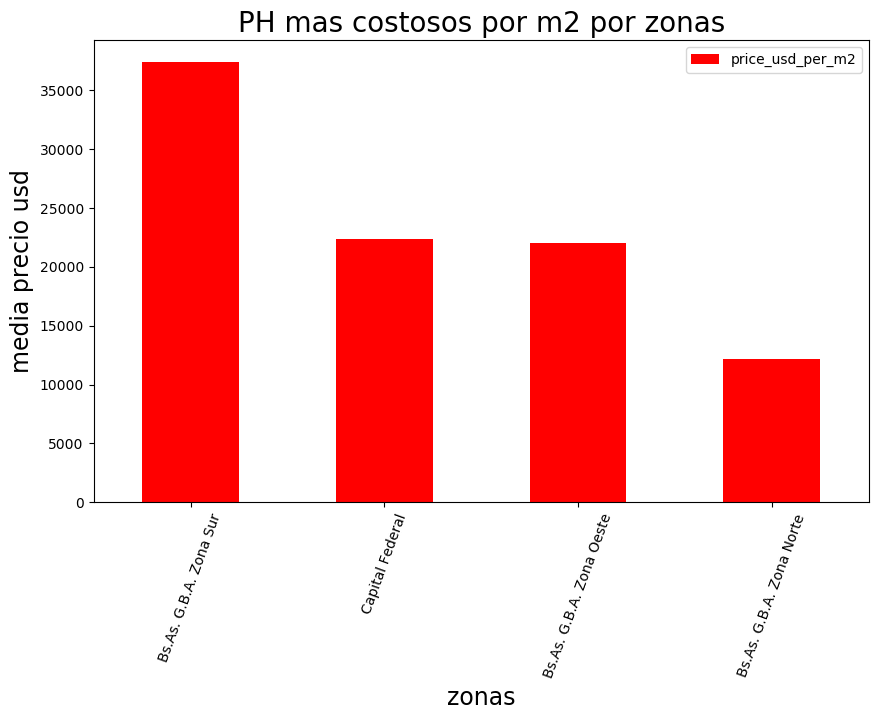

In [27]:
#los lugarares con los PH mas costosas por m2
esPH=prop['property_type']=="PH"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('state_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).plot(kind='bar', rot=70, figsize=(10,6), color='red', fontsize=10, grid=False);
plt.title('PH mas costosos por m2 por zonas', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [28]:
#es este caso podemos observar que los precios mas elevados son en capital y que en zona norte y oeste los precios 
#son similares

# como afecta el precio caracteristicas nombradas en la descripcion



In [29]:
# ¿en una misma zona en este caso benavidez como cambia el precio si la casa posee pileta?
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'San Isidro'
e = a.surface_covered_in_m2<200

f = a.surface_covered_in_m2>100
casas_pileta = a[b & c & d&e&f][['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta.groupby('place_name').agg({'price_aprox_usd':'mean'})



,price_aprox_usd
place_name,
San Isidro,308641.175362


In [30]:
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'San Isidro'
e = a.surface_covered_in_m2<200

f = a.surface_covered_in_m2>100
casas_sin_pileta = a[~b & c & d&e&f][['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_sin_pileta.groupby('place_name').agg({'price_aprox_usd':'mean'})

,price_aprox_usd
place_name,
San Isidro,273572.591812


In [31]:
#podemos observar en el barrio de san isidro como el precio pomedio de las propiedades aumento 
# 40000usd cuando la casa tiene pileta

In [32]:
#mismo analisis anterior pero en el barrio de benavidez
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'Benavidez'
e = a.surface_covered_in_m2<200

f = a.surface_covered_in_m2>100
casas_pileta = a[b & c & d&e&f][['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta.groupby('place_name').agg({'price_aprox_usd':'mean'})

,price_aprox_usd
place_name,
Benavidez,270954.545455


In [33]:
#propiedades sin pileta benavidez
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'Benavidez'
e = a.surface_covered_in_m2<200

f = a.surface_covered_in_m2>100
casas_pileta = a[~b & c & d&e&f][['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta.groupby('place_name').agg({'price_aprox_usd':'mean'})

,price_aprox_usd
place_name,
Benavidez,267092.475248


In [34]:
#notamos que en benavidez la diferencia de precio de casas con y sin pileta 
#es menor que en san isidro 

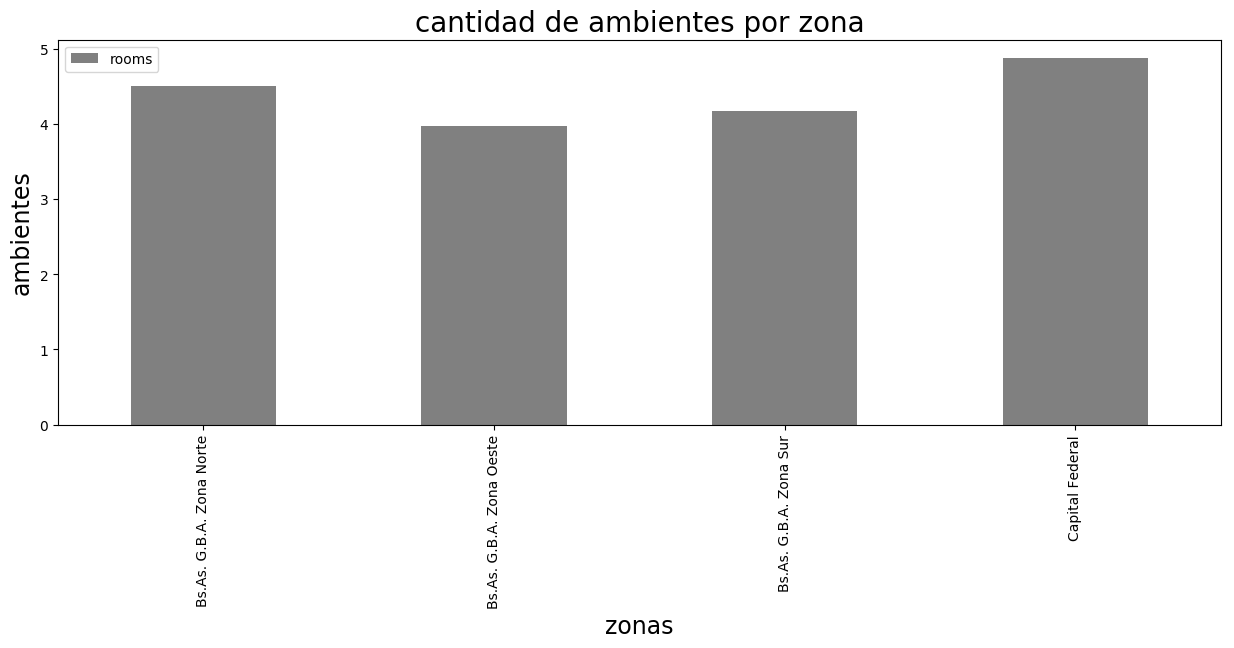

In [35]:
#¿que zona posee la media de mayor cantidad de ambientes?

edif = prop.dropna(subset=['price_usd_per_m2'])
#departamento = edif['property_type'] == "apartment"
casa = edif['property_type'] == "house"

res=edif[casa][['place_name','price_aprox_usd','floor','state_name','rooms']]
res.groupby('state_name').agg({'rooms':'mean'}).plot(kind = 'bar',color='grey' )#.sort_values(by='price_aprox_usd_per_m2',ascending = 0)
plt.title('cantidad de ambientes por zona', fontsize=20);
plt.ylabel('ambientes', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [36]:
#la media de ambientes por zona es de entre 4 y 5 ambientes

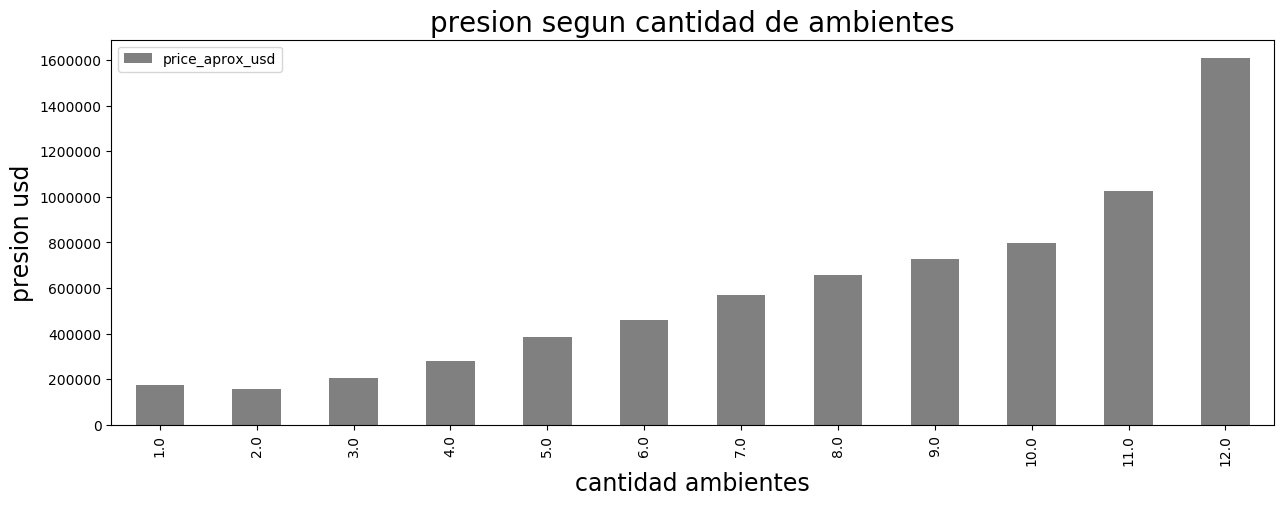

In [37]:
#¿precio por cantidad ambientes?

edif = prop.dropna(subset=['price_usd_per_m2'])
edif = prop.dropna(subset=['rooms'])
#departamento = edif['property_type'] == "apartment"
casa = edif['property_type'] == "house"
ambientes = edif['rooms'] < 13
noambientes0 = edif['rooms'] > 0
res=edif[noambientes0 & casa & ambientes][['place_name','price_aprox_usd','floor','state_name','rooms']]
res.groupby('rooms').agg({'price_aprox_usd':'mean'}).plot(kind = 'bar',color='grey' )#.sort_values(by='price_aprox_usd_per_m2',ascending = 0)
plt.title('presion segun cantidad de ambientes', fontsize=20);
plt.ylabel('presion usd', fontsize=17);
plt.xlabel('cantidad ambientes', fontsize=17);

In [38]:
#a medida que aumentan la cantidad de ambientes tambien aumenta el precio de la propiedad

In [39]:
prop_fecha=prop['created_on'].str.split(' ',3,expand=True) 
a=prop_fecha[0].str.split('-',3,expand=True)
 
prop['year']=a[0]
prop['month']=a[1]
prop['day']=a[2]
prop =prop

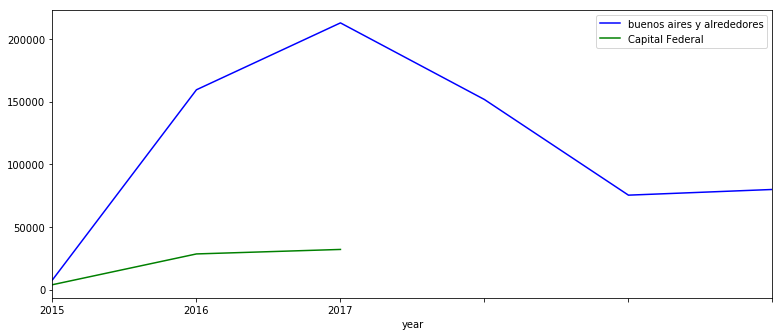

In [40]:
#cantidad de publicaciones de ventas,durante el 2012 a 2017
%matplotlib inline

fig = plt.figure(figsize=(10,4));

ax = fig.add_axes([0,0,1,1]);
prop.groupby('year').count()['created_on'].plot.line(c='b',label="buenos aires y alrededores")

 #cantidad de publicaciones de ventas,durante el 2012 a 2017 solo en Capital federal
 
x=prop['state_name']=="Capital Federal"
prop[x].groupby('year').count()['created_on'].plot.line(c='g', label="Capital Federal") 

 
ax.legend();


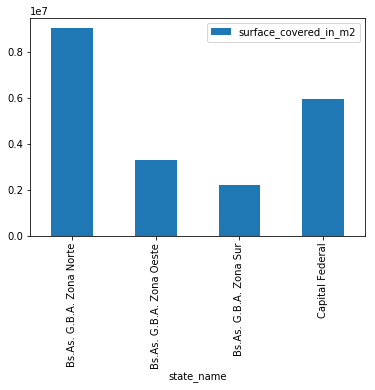

In [41]:
#cantidad de superficie cubierta de la empresa properati en capital federal,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste
 
prop[['surface_covered_in_m2','state_name']].groupby('state_name').agg({'surface_covered_in_m2':'sum'}).plot(kind='bar')


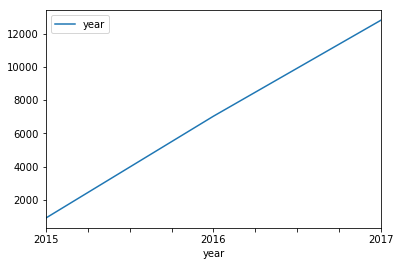

In [42]:
#cantidad de publicaciones de ventas,durante el 2012 a 2017 solo en "Bs.As. G.B.A. Zona Sur"
gbazs=prop['state_name']=="Bs.As. G.B.A. Zona Sur"
 
c=prop[['year','state_name']][gbazs].groupby('year').agg({'year':'count'})
c.plot()

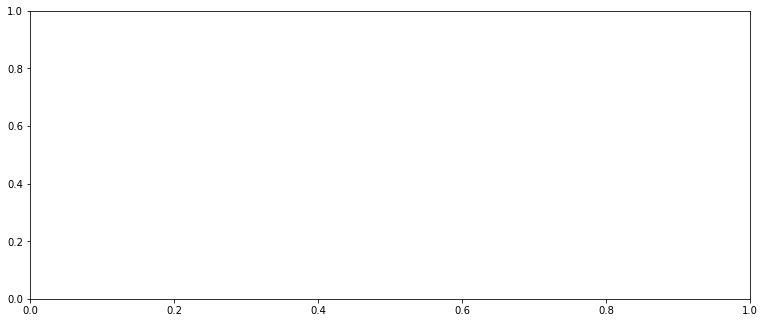

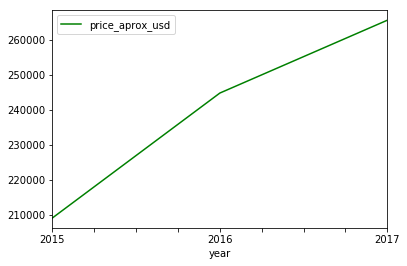

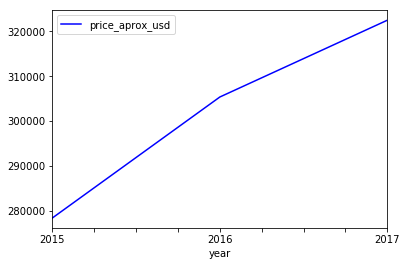

In [46]:
#precio promedio del total de propiedades   en Capital Federal de properati a travez de 2012 a 2017
#cantidad de publicaciones de ventas,durante el 2012 a 2017
%matplotlib inline

fig = plt.figure(figsize=(10,4));

ax = fig.add_axes([0,0,1,1]);

prop[['year','price_aprox_usd']][prop['state_name']=="Capital Federal"].groupby('year').agg\
({'price_aprox_usd':'mean'}).plot.line(c='g',label="buenos aires y alrededores")


prop[['year','price_aprox_usd']][prop['state_name']=="Bs.As. G.B.A. Zona Norte"].groupby('year').agg\
({'price_aprox_usd':'mean'}).plot.line(c='b',label="buenos aires y alrededores")

ax.legend();


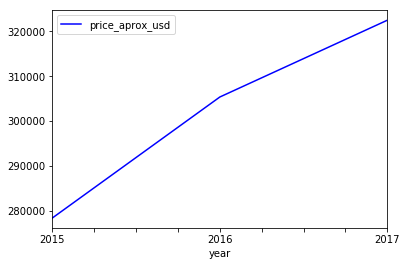

In [47]:
#precio promedio del total de propiedades   en zona norte de properati a travez de 2012 a 2017

prop[['year','price_aprox_usd']][prop['state_name']=="Bs.As. G.B.A. Zona Norte"].groupby('year').agg\
({'price_aprox_usd':'mean'}).plot.line(c='b',label="buenos aires y alrededores")

In [48]:
prop[['place_name']][prop['state_name']=="Capital Federal"].groupby('place_name').agg({'place_name':'count'}).sort_values().[:16].plot(kind='bar')

SyntaxError: invalid syntax (<ipython-input-48-6268e1b3268d>, line 1)

In [ ]:
#precio promedio del total de departamentos por año en capital
x=prop['property_type']=="apartment"
y=prop['state_name']=="Capital Federal"

prop[['year','price_aprox_usd']][y&x].groupby('year').agg\
({'price_aprox_usd':'mean'}).plot.line(c='b',label="buenos aires y alrededores")

In [49]:
#barrio que mas aumento por año
a = prop[['year','price_aprox_usd','place_name']].groupby(['year','place_name']).agg\
({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending=False)

In [50]:
a

price_aprox_usd
year place_name                                      
2015 Área de Promoción El Triángulo      6.000000e+06
     Loma Hermosa                        5.081357e+06
2014 San Isidro Chico                    2.275000e+06
     The Boating Club                    2.100000e+06
2017 Barrio La Isla                      1.863598e+06
2015 The Boating Club                    1.863333e+06
2016 San Isidro Chico                    1.850000e+06
2017 Bahía del Sol                       1.700000e+06
2014 Bahía del Sol                       1.500000e+06
2017 San Isidro Chico                    1.422500e+06
2014 Abril Club de Campo                 1.396667e+06
2016 Loma Verde                          1.384616e+06
2015 Platanos                            1.325455e+06
     Abril Club de Campo                 1.222294e+06
2014 Barrio El Golf                      1.200000e+06
2017 The Boating Club                    1.190000e+06
2016 Barrio El Yacht                     1.173333e+06
2017 El Talar de Pacheco                 1.144583e+06
2014 Club Newman                         1.094500e+06
2017 Pacheco Golf Club                   1.080769e+06
2015 Barrio La Isla                      1.061667e+06
2017 Country Farm Club                   1.056667e+06
     Palermo Chico                       1.039716e+06
2016 Barrio Cabos del Lago               1.029333e+06
2015 Barrio Los Castores                 9.887945e+05
2017 Barrio Privado "Ayres de Pilar"     9.675000e+05
2014 Armenia Country Club                9.500000e+05
2017 Marina Del Sol (Sun's Marine)       9.500000e+05
2015 Rincon Del Arca                     9.500000e+05
2016 Grand Bell                          9.300000e+05
...                                               ...
2014 San Alberto                         3.748187e+04
2016 Dock Sud                            3.666667e+04
2014 Dock Sud                            3.660307e+04
2016 Ingeniero Juan Allan                3.533333e+04
     Hindu Club                          3.500000e+04
2014 Ingeniero Juan Allan                3.483200e+04
     Pontevedra                          3.451782e+04
2017 Don Orione                          3.348322e+04
2013 Don Orione                          3.323270e+04
2015 Don Orione                          3.318528e+04
2013 Ministro Rivadavia                  3.228371e+04
     Ingeniero Juan Allan                3.227191e+04
2016 Don Orione                          3.033850e+04
2014 Don Orione                          2.907601e+04
2015 Mariano Acosta                      2.839073e+04
     Villa Brown                         2.698677e+04
     Aldo Bonzi                          2.666667e+04
2014 Mariano Acosta                      2.322394e+04
     Barrio Privado El Resuello          2.178880e+04
2016 Melchor Romero                      8.065660e+03
     El Libertador                       0.000000e+00
     Los Pingüinos Country Club          0.000000e+00
     Cuartel V                           0.000000e+00
     El Pilar                            0.000000e+00
     Club de Campo "Los Ceibos"          0.000000e+00
2015 Club El Carmen - Sector casas       0.000000e+00
     Berazategui Oeste                   0.000000e+00
2016 Arturo Seguí                        0.000000e+00
     Barrio  Pirvado Los Naranjos        0.000000e+00
     Barrio Cerrado Los Troncos          0.000000e+00

[2548 rows x 1 columns]

In [51]:
barrios_capital = prop[prop["state_name"] == "Capital Federal"]

In [52]:
lugares = barrios_capital["place_name"].value_counts()

In [53]:
i = lugares.index

In [54]:
barrios = i.values

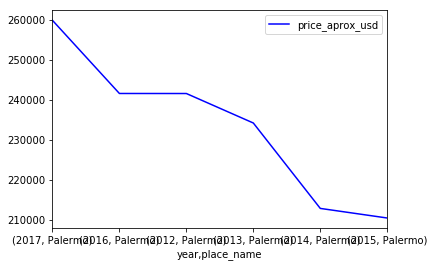

In [63]:
for b in barrios:
    data_b = prop[prop["place_name"] == b]
    data_b = data_b.dropna(subset = ["surface_total_in_m2"])
    data_b = data_b[data_b["price_aprox_usd"] > 0]
    prom_superficie = data_b["surface_total_in_m2"].mean()
    data_b = data_b[data_b["surface_total_in_m2"] < prom_superficie + 30]
    
    data_b = data_b[data_b["surface_total_in_m2"] > prom_superficie - 30]
    
    group = data_b[['year','price_aprox_usd','place_name']].groupby(['year','place_name']).agg\
({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending=False)
    group.plot.line(c='b',label=b)
    break